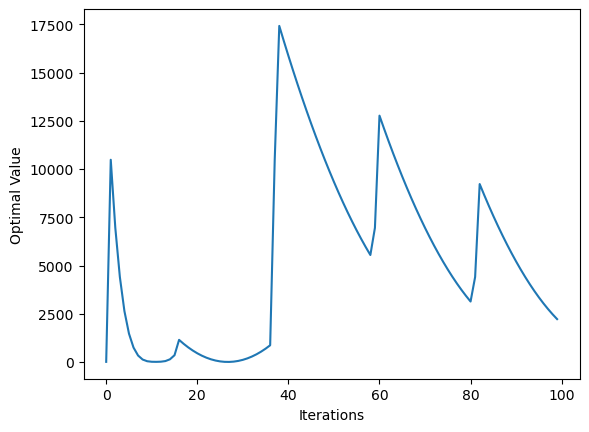

Optimal value: 1.0
Optimal input values: [0 1]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x[0]**2 - 3*x[1] + 2)**2 + (x[0] - x[1] + 1)**2

def branch_and_bound(f, bounds, max_iter=100):
    nodes = [(np.zeros(len(bounds)), bounds)]
    opt_val = np.inf
    opt_x = np.zeros(len(bounds))
    iter_count = 0
    opt_values = []
    while nodes:
        node = nodes.pop(0)
        if iter_count >= max_iter:
            break
        if opt_val <= node[1][0][0]:
            continue
        if not all(np.isfinite(node[0])):
            for i in range(len(bounds)):
                if np.isfinite(node[0][i]):
                    bounds_left = node[1].copy()
                    bounds_left[i] = (int(node[0][i]), int(node[0][i]))
                    nodes.append((np.zeros(len(bounds)), bounds_left))
            continue
        value = f(node[0])
        opt_values.append(value)
        if value < opt_val:
            opt_val = value
            opt_x = node[0].copy()
        for i in range(len(bounds)):
            # if np.isfinite(node[0][i]):
            #     continue
            for j in range(node[1][i][0], node[1][i][1] + 1):
                x = node[0].copy()
                x[i] = j
                bounds_left = node[1].copy()
                bounds_left[i] = (j, j)
                nodes.append((x, bounds_left))
        iter_count += 1
    plt.plot(opt_values)
    plt.xlabel('Iterations')
    plt.ylabel('Optimal Value')
    plt.show()
    return opt_val, opt_x.astype(int)

bounds = [(-10, 10), (-10, 10)]
opt_val, opt_x = branch_and_bound(f, bounds)
print("Optimal value:", opt_val)
print("Optimal input values:", opt_x)
